In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

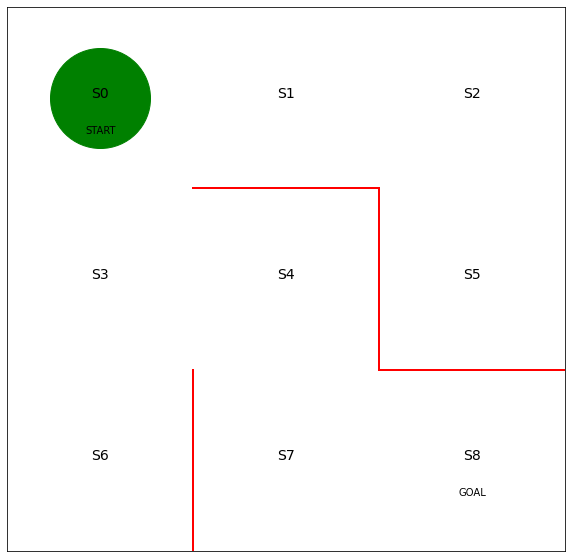

In [2]:
'''
초기 상태 미로 크기
'''
fig = plt.figure(figsize = (10, 10))
ax = plt.gca()

'''
붉은 벽 그리기
'''
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

'''
상태 문자열 표시: S0 ~ S8
'''
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

'''
범위 및 눈금 제거
'''
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

plt.tick_params(
    axis='both', 
    which='both', 
    bottom=False, 
    top=False, 
    labelbottom=False, 
    right=False, 
    left=False, 
    labelleft=False
)

'''
Start 위치에 녹색 원으로 현재 위치 표시
'''
line, = ax.plot([0.5], [2.5], marker = "o", color = 'g', markersize = 100)

## 정책 반복

정책 파라미터 theta에서 pi(s,a)를 구하는 방법 중에서 softmax function을 사용한다.

* softmax function을 사용하는 이유는 파라미터 theta가 음수가 돼도 계산할 수 있기 때문이다. 
* theta를 pi로 변환하는 데 softmax function을 사용하면 theta가 음수여도 확률을 계산할 수 있다는 이점이 있다.

In [3]:

'''
정책 - policy - pi
policy의 초기값 설정

행은 상태 0 ~ 7, 열은 행동 방향(상, 우, 하, 좌)를 나타낸다.
'''
theta_0 = np.array(
    [
        [np.nan, 1, 1, np.nan],  # s0
        [np.nan, 1, np.nan, 1],  # s1
        [np.nan, np.nan, 1, 1],  # s2
        [1, 1, 1, np.nan],  # s3
        [np.nan, np.nan, 1, 1],  # s4
        [1, np.nan, np.nan, np.nan],  # s5
        [1, np.nan, np.nan, np.nan],  # s6
        [1, 1, np.nan, np.nan],  # s7
        # ※s8은 목표지점이므로 정책이 없다
    ]
)

In [4]:
print(theta_0)
print(theta_0.shape)

[[nan  1.  1. nan]
 [nan  1. nan  1.]
 [nan nan  1.  1.]
 [ 1.  1.  1. nan]
 [nan nan  1.  1.]
 [ 1. nan nan nan]
 [ 1. nan nan nan]
 [ 1.  1. nan nan]]
(8, 4)


In [5]:
def softmax_convert_into_pi_from_theta(theta):
    
    # inverse temperature
    beta = 1.0
    
    # theta 행렬의 크기
    [m, n] = theta.shape
    
    pi = np.zeros((m, n))
    
    # theta를 exp(theta)로 치환
    exp_theta = np.exp(beta * theta)
    
    for i in range(0, m):
        
        # softmax function을 이용한 비율 계산
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
    
    # nan을 0으로 치환
    pi = np.nan_to_num(pi)
    
    return pi

In [6]:
'''
정의된 함수를 실행하여 theta zero로부터 초기 policy pi(s,a)를 구한다.
'''
pi_0 = softmax_convert_into_pi_from_theta(theta_0)

In [7]:
print(pi_0)
print(pi_0.shape)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]
(8, 4)


In [8]:
'''
에이전트가 policy - pi(s,a)를 따라 행동하게 만든다.
1단계 이동 후 에이전트의 상태를 구하는 함수를 정의한다.
'''
def get_action_and_next_state(pi, state):
    
    # 상, 우, 하, 좌
    direction = ["up", "right", "down", "left"]
    
    # pi[s, :]의 확률에 따라서 direction 값이 선택
    next_direction = np.random.choice(direction, p = pi[state, :])
    
    if next_direction == "up":
        
        action = 0
        
        # 위쪽으로 이동하면 상태값이 3만큼 감소
        s_next = state - 3
        
    elif next_direction == "right":
        
        action = 1
        
        # 오른쪽으로 이동하면 상태값이 1만큼 증가
        s_next = state + 1
        
    elif next_direction == "down":
        
        action = 2
        
        # 아래쪽으로 이동하면 상태값이 3만큼 증가
        s_next = state + 3
        
    elif next_direction == "left":
        
        action = 3
        
        # 왼쪽으로 이동하면 상태값이 1만큼 감소
        s_next = state - 1
        
    return [action, s_next]

In [9]:
'''
에이전트가 목표에 도달할 때까지 pi(s,a)에 따라 get_action_and_next_s 함수로 에이전트를 이동하며 계속 진행한다.
목표 지점에 도달할 때까지 에이전트를 계속 이동시키는 함수를 정의하고 while 문을 반복수행하며 상태와 행동 이력을 저장한다.
마지막에 상태와 행동을 반환한다.
'''
def goal_maze_ret_state_action(pi):
    
    # 시작 지점
    state = 0
    
    # 에이전트의 행동과 상태를 기록하는 리스트
    state_action_history = [[0, np.nan]]
    
    # 목표 지점에 이를 때까지 반복
    while(1):
        [action, next_s] = get_action_and_next_state(pi, state)
        
        # 현재 상태(마지막이므로 인덱스가 -1)를 state_action_history에 추가
        state_action_history[-1][1] = action
        
        # 경로 리스트에 다음 상태를 추가, 행동은 아직 알 수 없으므로 nan으로 추가
        state_action_history.append([next_s, np.nan])
        
        # 목표 지점에 도달하면 종료
        if next_s == 8:
            break
            
        else:
            state = next_s
            
    return state_action_history

In [10]:
'''
goal_maze_ret_state_action 함수를 사용하여 policy - pi(s,a)를 따라 에이전트를 이동시키고, 상태 이력을 state_history에 저장한다.
'''
state_action_history = goal_maze_ret_state_action(pi_0)

In [11]:
print(state_action_history)
print("목표 지점(S8)에 도달하기까지 걸린 단계 수:", len(state_action_history) - 1, "단계")

[[0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]
목표 지점(S8)에 도달하기까지 걸린 단계 수: 4 단계


## 정책경사 알고리즘으로 정책 수정

#### theta = theta + eta * delta_theta
#### delta_theta = {N(s(i), a(j)) + Pi(s(i), a(j)) * N(s(i), a(j))} / T
#### theta = theta + eta * {N(s(i), a(j)) + Pi(s(i), a(j)) * N(s(i), a)} / T

* theta는 상태 s(i)에서 행동 a(j)를 취할 확률을 결정하는 파라미터다. 
* eta는 학습률이라고 하며, theta가 1번 학습에 수정되는 정도를 제어한다. eta 값이 너무 작으면 학습 속도가 너무 늦어지고, 반대로 너무 크면 학습이 잘 안된다.

* N(s(i), a(j))는 상태 s(i)에서 행동 a(j)을 취한 횟수의 합계이다.
* Pi(s(i), a(j))는 현재 정책하에서 상태 s(i)일 때 행동 a(j)를 취할 확률을 나타낸다.
* N(s(i), a)는 상태 s(i)에서 모든 행동을 취한 횟수의 합계이다.
* T는 목표 지점에 이르기까지 걸린 모든 단계의 수다.

In [12]:
'''
theta를 수정하는 함수 정의
'''

def update_theta(theta, pi, state_action_history):
    
    # learning rate
    eta = 0.1
    
    # 목표 지점에 도달하기 까지 걸린 단계 수
    T = len(state_action_history) - 1
    
    # theta 행렬의 크기
    [m, n] = theta.shape
    
    # delta theta를 구할 준비, 포인터 참조이므로 delta_theta = theta로는 안됨
    delta_theta = theta.copy()
    
    # delta_theta 요소 단위 계산
    for i in range(0, m):
        for j in range(0, n):
            
            # theta가 nan이 아닌 경우
            if not(np.isnan(theta[i, j])):
                
                # 히스토리에서 상태 i인 것만 모아오는 리스트 컴프리헨션
                state_action_i = [state_action for state_action in state_action_history if state_action[0] == i]
                
                # 상태 i에서 행동 j를 취한 경우만 모음
                state_action_ij = [state_action for state_action in state_action_history if state_action == [i, j]]
                
                # 상태 i에서 모든 행동을 취한 횟수
                N_i = len(state_action_i)
                
                # 상태 i에서 행동 j를 취한 횟수
                N_ij = len(state_action_ij)
                
                delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                
    updated_theta = theta + eta * delta_theta
    
    return updated_theta

In [13]:
'''
policy 수정
'''
updated_theta = update_theta(theta_0, pi_0, state_action_history)
updated_pi = softmax_convert_into_pi_from_theta(updated_theta)

In [14]:
print(updated_pi)
print(updated_pi.shape)

[[0.         0.49375033 0.50624967 0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33054408 0.33891184 0.33054408 0.        ]
 [0.         0.         0.50624967 0.49375033]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49375033 0.50624967 0.         0.        ]]
(8, 4)


In [15]:
'''
미로에서 목표 지점으로 바로 갈 수 있을 만큼 파라미터 theta를 반복해서 수정하도록 하는 가장 바깥쪽 반복문을 구현한다.
'''

# policy의 변화가 10**(-4)보다 작아지면 학습 종료
stop_epsilon = 10 ** (-4)

theta = theta_0
pi = pi_0
is_continue = True
count = 1

# is_continue가 False가 될 때까지 반복
while is_continue:
    
    # pi를 따라 미로를 탐색한 기록을 구함
    state_action_history = goal_maze_ret_state_action(pi)
    
    # theta를 수정
    updated_theta = update_theta(theta, pi, state_action_history)
    
    # pi를 수정
    updated_pi = softmax_convert_into_pi_from_theta(updated_theta)
    
    # policy의 변화를 출력
    delta_pi = updated_pi - pi
    total_change_pi = np.sum(np.abs(delta_pi))
    print(total_change_pi)
    
    print("목표 지점(S8)에 도달하기까지 걸린 단계 수:", len(state_action_history) - 1, "단계")
    
    if total_change_pi < stop_epsilon:
        is_continue = False
    
    else:
        theta = updated_theta
        pi = updated_pi

0.0075818125441380335
목표 지점(S8)에 도달하기까지 걸린 단계 수: 74 단계
0.01801995709924631
목표 지점(S8)에 도달하기까지 걸린 단계 수: 16 단계
0.010727701634101583
목표 지점(S8)에 도달하기까지 걸린 단계 수: 108 단계
0.012406062832448828
목표 지점(S8)에 도달하기까지 걸린 단계 수: 58 단계
0.02433311895759932
목표 지점(S8)에 도달하기까지 걸린 단계 수: 8 단계
0.048932658218371505
목표 지점(S8)에 도달하기까지 걸린 단계 수: 4 단계
0.011208410062785112
목표 지점(S8)에 도달하기까지 걸린 단계 수: 44 단계
0.006219228651207165
목표 지점(S8)에 도달하기까지 걸린 단계 수: 126 단계
0.04956760894151624
목표 지점(S8)에 도달하기까지 걸린 단계 수: 4 단계
0.013353997603711254
목표 지점(S8)에 도달하기까지 걸린 단계 수: 40 단계
0.014389447541433842
목표 지점(S8)에 도달하기까지 걸린 단계 수: 26 단계
0.014582883138744951
목표 지점(S8)에 도달하기까지 걸린 단계 수: 18 단계
0.004197327590744704
목표 지점(S8)에 도달하기까지 걸린 단계 수: 154 단계
0.016524217885648174
목표 지점(S8)에 도달하기까지 걸린 단계 수: 12 단계
0.012971412033388585
목표 지점(S8)에 도달하기까지 걸린 단계 수: 18 단계
0.010508216260892711
목표 지점(S8)에 도달하기까지 걸린 단계 수: 60 단계
0.009689929378552953
목표 지점(S8)에 도달하기까지 걸린 단계 수: 48 단계
0.009530088642775825
목표 지점(S8)에 도달하기까지 걸린 단계 수: 28 단계
0.02127476890355201
목표 지점(S8)에

In [16]:
'''
학습이 끝난 policy 확인
'''

# 유효자리수: 3, 지수표시제거
np.set_printoptions(precision = 3, suppress = True)

In [17]:
print(pi)

[[0.    0.    1.    0.   ]
 [0.    0.465 0.    0.535]
 [0.    0.    0.459 0.541]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]]


In [18]:
'''
상태 이력을 따라 화면 상의 미로에서 에이전트를 이동시키는 애니메이션을 구현한다.
'''

from matplotlib import animation
from IPython.display import HTML

def init():
    
    # 배경 이미지 초기화
    line.set_data([], [])
    
    return (line,)

def animate(i):
    
    # 프레임 단위 이미지 생성
    
    # 현재 위치
    state = state_history[i]
    
    # 상태 s의 x좌표(3으로 나눈 나머지 + 0.5)
    x = (state % 3) + 0.5
    
    # 상태 s의 y좌표(2.5에서 3으로 나눈 몫을 뺌)
    y = 2.5 - int(state / 3)
    
    line.set_data(x, y)
    
    return (line,)

In [ ]:
'''
init() 함수와 animate() 함수를 사용하여 애니메이션 생성
'''
anim = animation.FuncAnimation(
    fig,
    animate, 
    init_func = init,
    frames = len(state_action_history),
    interval = 200,
    repeat = False
)

HTML(anim.to_jshtml())